# Simple example of integrating the Rubidium wavefunction

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.DEBUG)

In [2]:
n = 130
l = n - 1
atom = RydbergState("Rb", n=n, l=l, j=l + 0.5)

In [3]:
atom.integrate()

DEBUG database.py: No model potential parameters found for Rb with L=129, trying largest L
DEBUG database.py: No Rydberg-Ritz parameters found for Rb with L=129 and J=129, trying largest L and J


In [4]:
hydrogen = RydbergState("H", n=atom.n, l=atom.l, j=atom.j)
hydrogen.create_model(add_spin_orbit=False)
hydrogen.integrate()

DEBUG database.py: No model potential parameters found for H with L=129, trying largest L
DEBUG database.py: No Rydberg-Ritz parameters found for H with L=129 and J=129, trying largest L and J


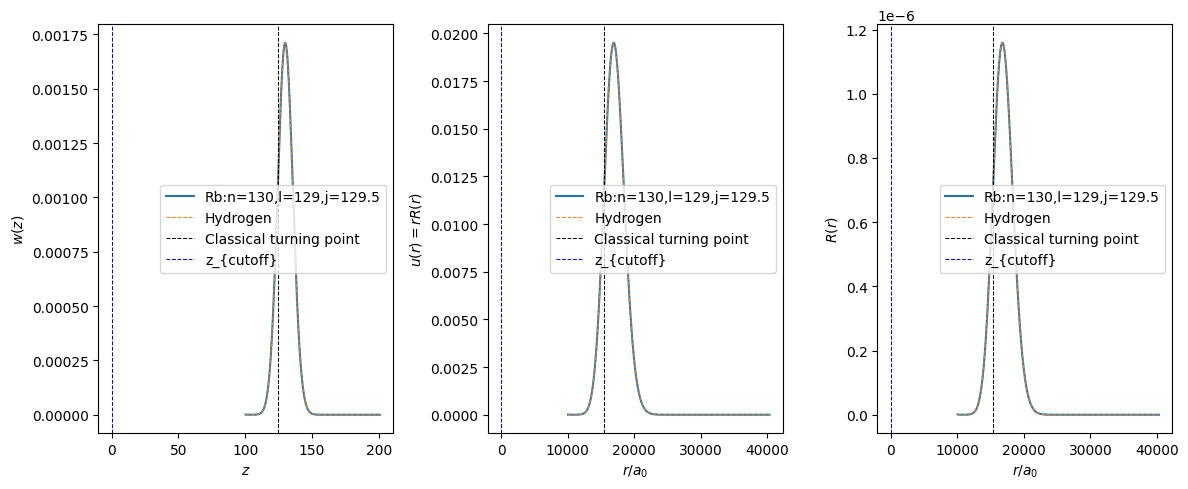

In [5]:
label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
z_turning_point = atom.calc_z_turning_point()

axs[0].plot(atom.grid.zlist, atom.wlist, "C0-", label=label)
axs[0].plot(hydrogen.grid.zlist, hydrogen.wlist, "C1--", lw=0.75, label="Hydrogen")
axs[0].axvline(z_turning_point, color="k", ls="--", lw=0.75, label="Classical turning point")
axs[0].axvline(atom.z_cutoff, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")
axs[0].legend()

axs[1].plot(atom.grid.xlist, atom.ulist, "C0-", label=label)
axs[1].plot(hydrogen.grid.xlist, hydrogen.ulist, "C1--", lw=0.75, label="Hydrogen")
axs[1].axvline(z_turning_point**2, color="k", ls="--", lw=0.75, label="Classical turning point")
axs[1].axvline(atom.z_cutoff**2, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(atom.grid.xlist, atom.Rlist, "C0-", label=label)
axs[2].plot(hydrogen.grid.xlist, hydrogen.Rlist, "C1--", lw=0.75, label="Hydrogen")
axs[2].axvline(z_turning_point**2, color="k", ls="--", lw=0.75, label="Classical turning point")
axs[2].axvline(atom.z_cutoff**2, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()

fig.tight_layout()
plt.show()

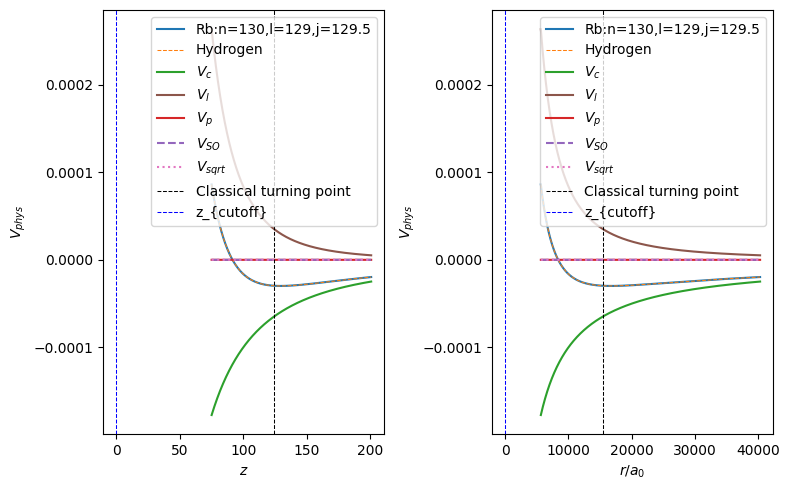

Rb energy: -2.9585607212803095e-05
Hydrogen energy: -2.9585798816568047e-05


In [6]:
plot_all_potentials = True

label = f"{atom.species}:n={atom.n},l={atom.l},j={atom.j}"
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
new_z_list = np.linspace(0.75 * np.sqrt(atom.grid.xmin), np.sqrt(atom.xmax), 10_000)
new_x_list = np.power(new_z_list, 2)
atom_V_phys = atom.model.calc_V_phys(new_x_list)
hydrogen_V_phys = hydrogen.model.calc_V_phys(new_x_list)

axs[0].plot(new_z_list, atom_V_phys, "C0-", label=label)
axs[0].plot(new_z_list, hydrogen_V_phys, "C1--", lw=0.75, label="Hydrogen")

if plot_all_potentials:
    axs[0].plot(new_z_list, atom.model.calc_V_c(new_x_list), "C2-", label=r"$V_c$")
    axs[0].plot(new_z_list, atom.model.calc_V_l(new_x_list), "C5-", label=r"$V_l$")
    axs[0].plot(new_z_list, atom.model.calc_V_p(new_x_list), "C3-", label=r"$V_p$")
    axs[0].plot(new_z_list, atom.model.calc_V_so(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[0].plot(new_z_list, atom.model.calc_V_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[0].axvline(z_turning_point, color="k", ls="--", lw=0.75, label="Classical turning point")
axs[0].axvline(atom.z_cutoff, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$V_{phys}$")
if axs[0].get_ylim()[1] > 2:
    axs[0].set_ylim(-2, 2)
axs[0].legend()

axs[1].plot(new_x_list, atom_V_phys, "C0-", label=label)
axs[1].plot(new_x_list, hydrogen_V_phys, "C1--", lw=0.75, label="Hydrogen")

if plot_all_potentials:
    axs[1].plot(new_x_list, atom.model.calc_V_c(new_x_list), "C2-", label=r"$V_c$")
    axs[1].plot(new_x_list, atom.model.calc_V_l(new_x_list), "C5-", label=r"$V_l$")
    axs[1].plot(new_x_list, atom.model.calc_V_p(new_x_list), "C3-", label=r"$V_p$")
    axs[1].plot(new_x_list, atom.model.calc_V_so(new_x_list), "C4--", label=r"$V_{SO}$")
    axs[1].plot(new_x_list, atom.model.calc_V_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

axs[1].axvline(z_turning_point**2, color="k", ls="--", lw=0.75, label="Classical turning point")
axs[1].axvline(atom.z_cutoff**2, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$V_{phys}$")
if axs[1].get_ylim()[1] > 2:
    axs[1].set_ylim(-2, 2)
axs[1].legend()


fig.tight_layout()
plt.show()

print(f"{atom.species} energy: {atom.energy}")
print(f"Hydrogen energy: {hydrogen.energy}")

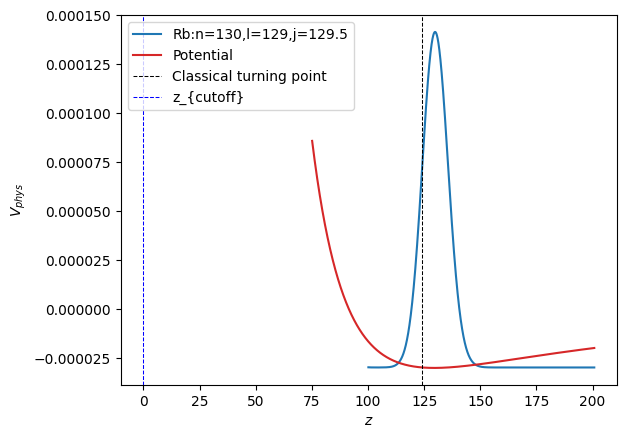

In [7]:
fig, ax = plt.subplots()

scale = 0.1

ax.plot(atom.grid.zlist, atom.wlist * scale + atom.energy, "C0-", label=label)
ax.plot(new_z_list, atom_V_phys, "C3-", label="Potential")
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$V_{phys}$")


ax.axvline(z_turning_point, color="k", ls="--", lw=0.75, label="Classical turning point")
ax.axvline(atom.z_cutoff, color="blue", ls="--", lw=0.75, label=r"z_{cutoff}")
ax.legend()
plt.show()